In [1]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/FoodClassify/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/FoodClassify/Validation_Data'

In [4]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 63 images belonging to 10 classes.
Found 63 images belonging to 10 classes.


In [5]:
train_dataset.class_indices

{'Banhbao': 0,
 'Banhcuon': 1,
 'Banhgai': 2,
 'Banhmi': 3,
 'Banhtrangcuon': 4,
 'Bokho': 5,
 'Bunbo': 6,
 'Chagio': 7,
 'Comtam': 8,
 'Hutieu': 9}

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [8]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
7/7 [==============================] - 33s 3s/step - loss: 2.5774 - accuracy: 0.0317 - val_loss: 2.3185 - val_accuracy: 0.1905
Epoch 2/50
7/7 [==============================] - 1s 165ms/step - loss: 2.3256 - accuracy: 0.1429 - val_loss: 2.2441 - val_accuracy: 0.2222
Epoch 3/50
7/7 [==============================] - 1s 149ms/step - loss: 2.2433 - accuracy: 0.2063 - val_loss: 2.1847 - val_accuracy: 0.1270
Epoch 4/50
7/7 [==============================] - 1s 185ms/step - loss: 2.1630 - accuracy: 0.2063 - val_loss: 2.0880 - val_accuracy: 0.3333
Epoch 5/50
7/7 [==============================] - 1s 159ms/step - loss: 2.0723 - accuracy: 0.3333 - val_loss: 1.8264 - val_accuracy: 0.4444
Epoch 6/50
7/7 [==============================] - 1s 138ms/step - loss: 1.9944 - accuracy: 0.3492 - val_loss: 1.5602 - val_accuracy: 0.4444
Epoch 7/50
7/7 [==============================] - 1s 137ms/step - loss: 1.7907 - accuracy: 0.3175 - val_loss: 1.5356 - val_accuracy: 0.3968
Epoch 8/50
7/7 [======

In [10]:
model.save('/content/drive/MyDrive/FoodClassify/FoodClassification.h5')

In [11]:
classificationFood_model = load_model('/content/drive/MyDrive/FoodClassify/FoodClassification.h5')

In [13]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

7/7 [==============================] - 0s 42ms/step - loss: 0.0095 - accuracy: 1.0000
Test loss =  0.009476926177740097
Test accuracy =  1.0


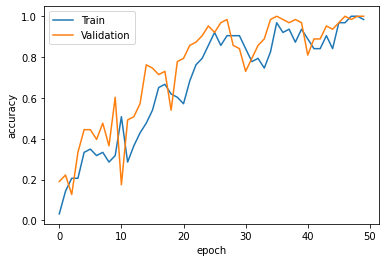

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Predict is:  Banhbao


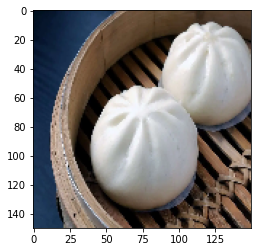

In [16]:
img = load_img('/content/drive/MyDrive/FoodClassify/Pred_Data/2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhcuon',
 'Banhgai',
 'Banhmi',
 'Banhtrangcuon',
 'Bokho',
 'Bunbo',
 'Chagio',
 'Comtam',
 'Hutieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Predict is:  Banhgai


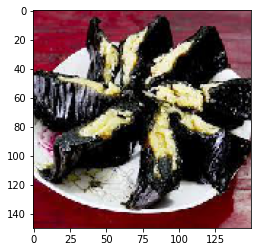

In [17]:
img = load_img('/content/drive/MyDrive/FoodClassify/Pred_Data/banhgai.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhcuon',
 'Banhgai',
 'Banhmi',
 'Banhtrangcuon',
 'Bokho',
 'Bunbo',
 'Chagio',
 'Comtam',
 'Hutieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Predict is:  Bokho


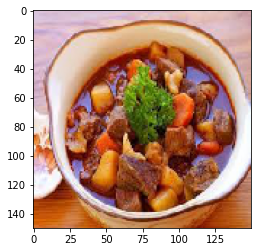

In [20]:
img = load_img('/content/drive/MyDrive/FoodClassify/Pred_Data/bokho.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhcuon',
 'Banhgai',
 'Banhmi',
 'Banhtrangcuon',
 'Bokho',
 'Bunbo',
 'Chagio',
 'Comtam',
 'Hutieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Predict is:  Comtam


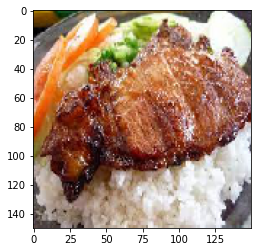

In [21]:
img = load_img('/content/drive/MyDrive/FoodClassify/Pred_Data/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhcuon',
 'Banhgai',
 'Banhmi',
 'Banhtrangcuon',
 'Bokho',
 'Bunbo',
 'Chagio',
 'Comtam',
 'Hutieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

In [22]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('FoodClassify.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-25 02:17:16--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-25 02:17:16 (38.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FoodClassify.ipynb to pdf
[NbConvertApp] Support files will be in FoodClassify_files/
[NbConvertApp] Making directory ./FoodClassify_files
[NbConvertApp] Making directory ./Food

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'